In [0]:
from google.colab import files

In [0]:
!ls

sample_data


In [0]:
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [0]:
uploade = files.upload()

Saving attention.py to attention.py


In [0]:
from attention import AttentionLayer

In [0]:
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input, Concatenate, Bidirectional, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", 200)

Using TensorFlow backend.


In [0]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,Unnamed: 0,Title,Body
0,0,अमेरिकी सांसदसँगको भेटमा खतिवडाले भने– एमसिसी अनुमोदन,अर्थमन्त्री डा युवराज खतिवडाले एमसिसी सहजै अनुमोदन बताएका अमेरिकी कंग्रेस सांसदसँगको भेटमा खतिवडाले एमसिसी प्राप्त अमेरिकी अनुदान सहायता नेपाललाई चाहिने कुरामा द्विविधा नभएको उल्लेख गरे भेटमा खतिव...
1,1,सञ्चार मन्त्रालयको जिम्मा खतिवडालाई सहरी विकास नेम्वाङलाई,प्रधानमन्त्री केपी शर्मा ओलीले गोकुल बाँस्कोटाको राजीनामापछि रिक्त सञ्चार सूचना प्रविधि मन्त्रालयको जिम्मेवारी अर्थ मन्त्री युवराज खतिवडालाई दिएका त्यस्तै सहरी विकास मन्त्रालयको जिम्मेवारी वसन्त न...
2,2,विप्लवका कार्यकर्ता बिपी विद्रोही पक्राउ,नेत्रविक्रम चन्द विप्लव समूहका कार्यकर्ता काठमाडौंबाट पक्राउ परेका बिहीबार दिउँसो कुलेश्वरबाट चन्दा उठाउन जाने क्रममा २९ वर्षीय वृहस्पति पौडेल बिपी विद्रोही पक्राउ परेका 'चन्दा उठाउन जाँदै गर्दा आ...
3,3,एमसिसी कार्यदलले शुक्रबार प्रतिवेदन बुझाउने तयारी,मिलेनियम च्यालेञ्ज कर्पोरेसन एमसिसी विषयमा अध्ययन बनेको कार्यदलले शुक्रबार अन्तिम प्रतिवेदन बुझाउने सत्तारूढ दल नेपाल कम्युनिष्ट पार्टी नेकपा केन्द्रीय समिति बैठकले गठन कार्यदलले शुक्रबार एमसिसीको...
4,4,भारतमा बस ट्रक ठोक्किँदा १९ मृत्यु,दक्षिणी भारतमा बस ट्रक एकआपसमा ठोक्किँदा कम्तीमा १९ जनाको मृत्यु बिहीबार बिहान दक्षिणी भारतको तमिलनाडुस्थित अभिनासा नजिकैको राजमार्गमा ट्रक बस आपसमा ठोक्किएको बस ड्राइभरको घटनास्थलमै मृत्यु भएपनि ...


In [0]:
df['Body'][:10]

0    अर्थमन्त्री डा युवराज खतिवडाले एमसिसी सहजै अनुमोदन बताएका अमेरिकी कंग्रेस सांसदसँगको भेटमा खतिवडाले एमसिसी प्राप्त अमेरिकी अनुदान सहायता नेपाललाई चाहिने कुरामा द्विविधा नभएको उल्लेख गरे भेटमा खतिव...
1    प्रधानमन्त्री केपी शर्मा ओलीले गोकुल बाँस्कोटाको राजीनामापछि रिक्त सञ्चार सूचना प्रविधि मन्त्रालयको जिम्मेवारी अर्थ मन्त्री युवराज खतिवडालाई दिएका त्यस्तै सहरी विकास मन्त्रालयको जिम्मेवारी वसन्त न...
2    नेत्रविक्रम चन्द विप्लव समूहका कार्यकर्ता काठमाडौंबाट पक्राउ परेका बिहीबार दिउँसो कुलेश्वरबाट चन्दा उठाउन जाने क्रममा २९ वर्षीय वृहस्पति पौडेल बिपी विद्रोही पक्राउ परेका 'चन्दा उठाउन जाँदै गर्दा आ...
3    मिलेनियम च्यालेञ्ज कर्पोरेसन एमसिसी विषयमा अध्ययन बनेको कार्यदलले शुक्रबार अन्तिम प्रतिवेदन बुझाउने सत्तारूढ दल नेपाल कम्युनिष्ट पार्टी नेकपा केन्द्रीय समिति बैठकले गठन कार्यदलले शुक्रबार एमसिसीको...
4    दक्षिणी भारतमा बस ट्रक एकआपसमा ठोक्किँदा कम्तीमा १९ जनाको मृत्यु बिहीबार बिहान दक्षिणी भारतको तमिलनाडुस्थित अभिनासा नजिकैको राजमार्गमा ट्रक बस आपसमा ठोक्किएको बस ड्राइभरको घटन

In [0]:
df['summary'] = df['Title'].apply(lambda x : '_START_ '+ x + ' _END_')


In [0]:
# X = df.iloc[:, 1].values
# y = df.iloc[:, 2].values

In [0]:
# for i in range(len(df)):
#     print("Review:",X[i])
#     print("Summary:",y[i])
#     print("\n")

In [0]:
df_new = df[df['Body'].notnull()] #There will cause error of the float so that we need to do that.

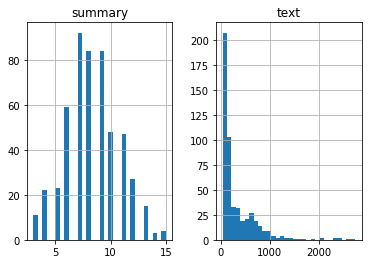

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df_new['Body']:
      text_word_count.append(len(i.split()))

for i in df_new['summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

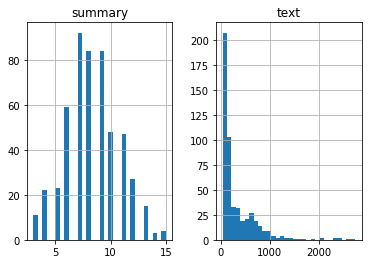

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df_new['Body']:
      text_word_count.append(len(i.split()))

for i in df_new['summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [0]:
max_len_text=150 
max_len_summary=15

In [0]:
# X = df_new.iloc[:, 1].values
# y = df_new.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_new['Body'],df_new['summary'],test_size=0.3,random_state=0,shuffle=True) 


In [0]:
x_train

422    ओमानविरुद्ध एकदिवसीय अन्तर्राष्ट्रिय खेलमा डेब्यू युवा बलर अभिनाश बोहोराले विकेट लिएका बुधबार त्रिवि क्रिकेट मैदानमा खेलमा बोहोराले १२ ओभरको बलमा अकिव ल्यासलाई रन आउट गरे विकेटसँगै बोहोराले नेपालक...
188    गुलियो मन पर्न छाड्यो गुलियो खादिनँचिनी भात खाएकै कारण मेरा दाँत बिग्रिए सरकारको निर्णय हेरिरहेको डाक्टरको अनसन हैन योसरकारको दबाब होगरिब किसानको प्रभाव होमाफिया दलालहरूको रवाफ बन्द आँखा खोल सरकार...
393    दरबारमार्गको शालिकबाट नारायणहिटी जाँदै गर्दा देब्रे तर्फको घरको तल्लामा नौलो रेष्टुरेन्ट बिहीबार शिक्षा विज्ञान प्रविधि मन्त्री गिरिराजमणि पोख्रेल उक्त रेष्टुरेन्ट उद्घाटन सानोतिनो रेष्टुरेन्ट उद्...
5      प्रतिनिधिसभाको सार्वजनिक लेखा समितिले निवर्तमान सञ्चार सूचना प्रविधि मन्त्री गोकुल बाँस्कोटासँग कमिसनको कुराकानी विजय प्रकाश मिश्रलाई कारबाही प्रहरीलाई पत्राचार उनलाई अडिओ टेप सार्वजनिक गरेकोमा नभ...
141    गरिमा धानको विउ भनी जातको कमसल धानको विउ आयात आयातकर्ता वितरक कम्पनीलाई ३१ लाख २० हजार जरिवाना वाणिज्य आपूर्ति उपभोक्ता संरक्षण विभागले उपभोक्ता संरक्षण ऐन २०७५ आयात

In [0]:
import numpy as np
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

#convert text sequences into integer sequences
x_train    =   x_tokenizer.texts_to_sequences(x_train) 
x_test   =   x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_train    =   pad_sequences(x_train,  maxlen=max_len_text, padding='post')
x_test   =   pad_sequences(x_test, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [0]:
import numpy as np
np.argmax(x_train)

54436

In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

#convert summary sequences into integer sequences
y_train    =   y_tokenizer.texts_to_sequences(y_train) 
y_test   =   y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_train    =   pad_sequences(y_train, maxlen=max_len_summary, padding='post')
y_test   =   pad_sequences(y_test, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [0]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 150, 500)     16050000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 150, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [0]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=5)


In [0]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,batch_size=128, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 363 samples, validate on 156 samples
Epoch 1/50
363/363 [==============================] - 6s 17ms/sample - loss: 7.3311 - acc: 0.3174 - val_loss: 4.7112 - val_acc: 0.7344
Epoch 2/50
363/363 [==============================] - 2s 7ms/sample - loss: 4.8105 - acc: 0.4801 - val_loss: 2.2390 - val_acc: 0.7344
Epoch 3/50
363/363 [==============================] - 2s 7ms/sample - loss: 3.8516 - acc: 0.4791 - val_loss: 2.0672 - val_acc: 0.6603
Epoch 4/50
363/363 [==============================] - 2s 7ms/sample - loss: 3.7457 - acc: 0.4880 - val_loss: 2.2329 - val_acc: 0.6992
Epoch 5/50
363/363 [==============================] - 2s 7ms/sample - loss: 3.6720 - acc: 0.4845 - val_loss: 2.1368 - val_acc: 0.6996
Epoch 6/50
363/363 [==============================] - 3s 7ms/sample - loss: 3.6087 - acc: 0.4919 - val_loss: 2.1299 - val_acc: 0.6909
Epoch 7/50
363/363 [==============================] - 2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model_save_name = 'processed_text_summarizer.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)

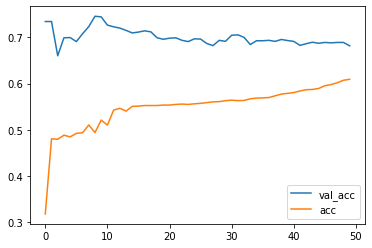

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.show()

In [0]:
print(y_tokenizer.word_index)

{'start': 1, 'end': 2, 'प्रधानमन्त्री': 3, 'नेपाली': 4, 'प्रदेश': 5, 'नेपाल': 6, 'मृत्यु': 7, 'पक्राउ': 8, 'त्रिकोणात्मक': 9, 'सरकारको': 10, 'हजार': 11, 'लाख': 12, 'मुख्यमन्त्री': 13, 'नेपाललाई': 14, 'पुराना': 15, 'सिरिजः': 16, 'विकेट': 17, 'सजाय': 18, 'मान्छे': 19, 'वर्ष': 20, '१०': 21, 'जग्गा': 22, 'ग्लोबल': 23, 'बैंकको': 24, 'कार्यकर्ता': 25, 'मन्त्री': 26, 'घर': 27, 'पर्यटक': 28, 'प्रधानमन्त्रीको': 29, 'डेब्यू': 30, 'लिए': 31, 'कारबाही': 32, 'आउट': 33, 'कथा': 34, 'घाइते': 35, 'कर्णाली': 36, 'सडक': 37, '१७': 38, 'होइन': 39, 'सय': 40, 'मूल्य': 41, 'सिनेमा': 42, 'सरकारका': 43, '२': 44, 'जनाको': 45, 'बाबुराम': 46, 'गीत': 47, 'मुद्दा': 48, 'खेल': 49, 'हत्या': 50, 'सुरू': 51, 'आज': 52, 'सम्बोधन': 53, 'माग': 54, 'अभिनेता': 55, 'प्रश्न': 56, 'रन': 57, 'बनाएर': 58, '९': 59, 'नेपालको': 60, 'भयो': 61, 'प्रतिवेदन': 62, 'बाँस्कोटा': 63, 'ओली': 64, 'फिर्ता': 65, '३': 66, 'छ': 67, 'सुनको': 68, 'तयारी': 69, 'शुक्रबार': 70, 'देखाउने': 71, 'दोषी': 72, 'छैन': 73, 'करोड': 74, 'दिन': 75, 'पशुपति': 76, 

In [0]:
reverse_target_word_index = y_tokenizer.word_index
reverse_source_word_index = x_tokenizer.word_index
target_word_index = y_tokenizer.word_index

In [0]:
reverse_source_word_index = dict([(value, key) for key, value in reverse_source_word_index.items()])
reverse_target_word_index = dict([(value, key) for key, value in reverse_target_word_index.items()])
#target_word_index = dict([(value, key) for key, value in target_word_index.items()])

In [0]:
reverse_target_word_index

{1: 'start',
 2: 'end',
 3: 'प्रधानमन्त्री',
 4: 'नेपाली',
 5: 'प्रदेश',
 6: 'नेपाल',
 7: 'मृत्यु',
 8: 'पक्राउ',
 9: 'त्रिकोणात्मक',
 10: 'सरकारको',
 11: 'हजार',
 12: 'लाख',
 13: 'मुख्यमन्त्री',
 14: 'नेपाललाई',
 15: 'पुराना',
 16: 'सिरिजः',
 17: 'विकेट',
 18: 'सजाय',
 19: 'मान्छे',
 20: 'वर्ष',
 21: '१०',
 22: 'जग्गा',
 23: 'ग्लोबल',
 24: 'बैंकको',
 25: 'कार्यकर्ता',
 26: 'मन्त्री',
 27: 'घर',
 28: 'पर्यटक',
 29: 'प्रधानमन्त्रीको',
 30: 'डेब्यू',
 31: 'लिए',
 32: 'कारबाही',
 33: 'आउट',
 34: 'कथा',
 35: 'घाइते',
 36: 'कर्णाली',
 37: 'सडक',
 38: '१७',
 39: 'होइन',
 40: 'सय',
 41: 'मूल्य',
 42: 'सिनेमा',
 43: 'सरकारका',
 44: '२',
 45: 'जनाको',
 46: 'बाबुराम',
 47: 'गीत',
 48: 'मुद्दा',
 49: 'खेल',
 50: 'हत्या',
 51: 'सुरू',
 52: 'आज',
 53: 'सम्बोधन',
 54: 'माग',
 55: 'अभिनेता',
 56: 'प्रश्न',
 57: 'रन',
 58: 'बनाएर',
 59: '९',
 60: 'नेपालको',
 61: 'भयो',
 62: 'प्रतिवेदन',
 63: 'बाँस्कोटा',
 64: 'ओली',
 65: 'फिर्ता',
 66: '३',
 67: 'छ',
 68: 'सुनको',
 69: 'तयारी',
 70: 'शुक्रबार',
 71: '

In [0]:
target_word_index

{'start': 1,
 'end': 2,
 'प्रधानमन्त्री': 3,
 'नेपाली': 4,
 'प्रदेश': 5,
 'नेपाल': 6,
 'मृत्यु': 7,
 'पक्राउ': 8,
 'त्रिकोणात्मक': 9,
 'सरकारको': 10,
 'हजार': 11,
 'लाख': 12,
 'मुख्यमन्त्री': 13,
 'नेपाललाई': 14,
 'पुराना': 15,
 'सिरिजः': 16,
 'विकेट': 17,
 'सजाय': 18,
 'मान्छे': 19,
 'वर्ष': 20,
 '१०': 21,
 'जग्गा': 22,
 'ग्लोबल': 23,
 'बैंकको': 24,
 'कार्यकर्ता': 25,
 'मन्त्री': 26,
 'घर': 27,
 'पर्यटक': 28,
 'प्रधानमन्त्रीको': 29,
 'डेब्यू': 30,
 'लिए': 31,
 'कारबाही': 32,
 'आउट': 33,
 'कथा': 34,
 'घाइते': 35,
 'कर्णाली': 36,
 'सडक': 37,
 '१७': 38,
 'होइन': 39,
 'सय': 40,
 'मूल्य': 41,
 'सिनेमा': 42,
 'सरकारका': 43,
 '२': 44,
 'जनाको': 45,
 'बाबुराम': 46,
 'गीत': 47,
 'मुद्दा': 48,
 'खेल': 49,
 'हत्या': 50,
 'सुरू': 51,
 'आज': 52,
 'सम्बोधन': 53,
 'माग': 54,
 'अभिनेता': 55,
 'प्रश्न': 56,
 'रन': 57,
 'बनाएर': 58,
 '९': 59,
 'नेपालको': 60,
 'भयो': 61,
 'प्रतिवेदन': 62,
 'बाँस्कोटा': 63,
 'ओली': 64,
 'फिर्ता': 65,
 '३': 66,
 'छ': 67,
 'सुनको': 68,
 'तयारी': 69,
 'शुक्रबार': 70,
 'देखा

In [0]:
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text, latent_dim))
dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_out_inf, attn_state_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis = -1, name = 'concat')([decoder_outputs2, attn_out_inf])
decoder_outputs2 = decoder_dense(decoder_inf_concat)
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [0]:
reverse_target_word_index[0] =  '|'

In [0]:
# def decode_sequence(input_seq):
#   e_out, e_h, e_c = encoder_model.predict(input_seq)
#   target_seq = np.zeros((1, 1))
#   target_seq[0, 0] = target_word_index['start']
#   stop_condition = False
#   decoded_sentence = ''
#   while not stop_condition:
#     output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
#     #print(output_tokens.shape)
#     sampled_token_index = np.argmax(output_tokens[0, -1, :])
#     #print(sampled_token_index)
#     sampled_token = reverse_target_word_index[sampled_token_index]
#     # print(sampled_token)
#     if(sampled_token != 'end'):
#       decoded_sentence += ' '+sampled_token
#       if(sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
#         stop_condition = True
    
#     target_seq = np.zeros((1, 1))
#     target_seq[0, 0] = sampled_token_index
#     #print(target_seq[0, 0])
#     #print(sampled_token_index)

#     e_h, e_c = h, c

#   return decoded_sentence



def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        #print(output_tokens)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        #print(sampled_token_index)
        sampled_token = reverse_target_word_index[sampled_token_index]
        #print(sampled_token)

        if(sampled_token!='end'):
            decoded_sentence += ' ' + sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
  newString = ''
  for i in input_seq:
    if(i!=0 and i!=target_word_index['start'] and i!=target_word_index['end']):
      newString = newString+reverse_target_word_index[i]+' '
  return newString


def seq2text(input_seq):
  newString = ''
  for i in input_seq:
    if(i!=0):
      newString = newString+reverse_source_word_index[i]+' '
  return newString


In [0]:
for i in range(50):
  print("Body:", seq2text(x_test[i]))
  print("Original Summary:", seq2summary(y_test[i]))
  print("Predicted Summary:", decode_sequence(x_test[i].reshape(1, max_len_text)))
  print('\n')

Body: घरेलु मैदानमा ओमानविरुद्ध एकदिवसीय अन्तर्राष्ट्रिय नेपालका युवा खास बुधबार कीर्तिपुरस्थित त्रिवि क्रिकेट मैदानमा खेलमा नेपालबाट युवा बलर अभिनाश बोहोरा सुसन भारीले डेब्यू खेलमा सुसन भारीले डेब्यू खेलमा उत्कृष्ट प्रदर्शन शानदार साबित नेपाललाई महत्वपूर्ण विकेट दिलाए गरे क्याच आउट गरे योसँगै नेपाललाई सुसन भारी करण केसीले समान विकेट दिलाएका खेलमा नेपालले टस जितेर फिल्डिङ रोजेको लिग २ त्रिकोणात्मक सिरिज अवधारणा अनुरूप कीर्तिपुरमा साता नेपाल ओमानसँगै अमेरिकाले एकआपसमा २ २ प्रतिस्पर्धा गर्दैछन् प्रत्येक टिमले ४ वटा एकदिवसीय खेल खेल्नेछन् लिग २ सिजिज प्रतियोगिता भनेको सन् २०२३ एकदिवसीय विश्वकप छनोट चरणमा पुग्ने प्रवेश ढोका नेपालसहित ७ टोलीले प्रतिस्पर्धा गर्दैछन् टोलीका शीर्ष ३ टोली सोझैं विश्वकप छनोट चरणमा पुग्नेछन् समुहमा अहिलेसम्म ८ खेलबाट ६ खेल जितेको अमेरिका शीर्ष स्थानमा नेपालको सि‍रिजमा खेल 
Original Summary: त्रिकोणात्मक सिरिजः सुसन भारीको एकदिवसीय अन्तर्राष्ट्रियमा शानदार डेब्यू लिए विकेट 
Predicted Summary:  त्रिकोणात्मक सिरिजः नेपाल नेपाल भेटिए प्रचण्ड प्रधानमन्त्री | | | | | |